<a href="https://colab.research.google.com/github/alarcon7a/youtube-tutorial-sources/blob/main/Notebooks/Google%20AI/Vertex%20AI/VERTEX_AI_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando librerias

In [ ]:
!pip install --quiet --upgrade google-genai google-cloud-aiplatform

In [ ]:
from IPython.display import HTML, Markdown, display
from google import genai
import os

### Acceso a Vertex AI a traves de nuestro json file

 Reemplazar por tu archivo .json


In [ ]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/gde-access-832554d3ac63.json'

### Haciendo inferencia

In [ ]:
client = genai.Client(
      vertexai=True,
      project="gde-access",
      location="us-central1",
  )


In [ ]:
model = "gemini-2.0-flash"

response = client.models.generate_content(
    model=model, contents="Dime quien eres en forma de Haiku"
)

display(Markdown(response.text))

Curioso soy yo,
En letras busco respuestas,
Un eco digital.


### Otros modelos

#### Internos

In [ ]:
model = "gemini-2.0-pro-exp-02-05"


response = client.models.generate_content(
    model=model, contents="Dime quien es tu creador, hazlo como si fueras un pirata"
)

display(Markdown(response.text))

#### Externos

In [ ]:
model_meta = "meta/llama-3.1-70b-instruct-maas"


response = client.models.generate_content(
    model=model_meta, contents="Dime quien eres"
)

display(Markdown(response.text))

### Tools

In [ ]:
from google.genai.types import Tool, GenerateContentConfig, GoogleSearch

google_search_tool = Tool(
    google_search = GoogleSearch()
)

response = client.models.generate_content(
    model=model,
    contents="Cuanto cuesta a hoy la accion de NVIDIA?",
    config=GenerateContentConfig(
        tools=[google_search_tool],
        response_modalities=["TEXT"],
    )
)

In [ ]:
display(Markdown(response.text))

El precio de las acciones de NVIDIA (NVDA) varía a lo largo del día de negociación, y existen diferentes fuentes que proveen información en tiempo real. Aquí hay algunos datos a partir del 13 de febrero de 2025:

*   **Investing.com:** Muestra un precio en tiempo real de $132.67 USD.
*   **LiteFinance:** Indica que el precio de hoy de las acciones de NVIDIA es de $131.12 USD.
*   **Bolsamania.com:** Indica un precio de $131.140 USD a las 02:00 del 13 de febrero de 2025.
*   **eToro:** El precio de la acción es de $130.95 USD.
*   **TradingView:** Cotiza a $131.14 USD, con una disminución de -1.25% en las últimas 24 horas.

Hay que tomar en cuenta que Wise muestra el precio en Euros (€127.85).

Además del precio, algunas fuentes ofrecen información adicional como:

*   **Volumen:** La cantidad de acciones que se negocian.
*   **Apertura:** El precio con el que la acción comenzó el día.
*   **Cierre:** El último precio al que se negoció la acción.
*   **Máximo/Mínimo (día):** Los precios más alto y más bajo alcanzados durante el día.
*    **Capitalización de Mercado**: Es el valor total de mercado de todas las acciones.



In [ ]:
for _ in response.candidates[0].grounding_metadata:
    print(_)

('grounding_chunks', [GroundingChunk(retrieved_context=None, web=GroundingChunkWeb(title='litefinance.org', uri='https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUBnsYvyEsQLR6EQNMbYUONd7rYrI92O2lwAonexTqk5e7RDbi0K-wBNx9jhFrX7gfaVCtuwKpk4jusPs57mncMY0FFNOqbnfP_uAQgCifUUfBknmEUTMa-QX6ke3YQdNw8dUeW0B3D3u3sJk8obbVVOpRAHSqw1vC1dxWOxF8JgBPulEnOqc_vhDQ==')), GroundingChunk(retrieved_context=None, web=GroundingChunkWeb(title='bolsamania.com', uri='https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUBnsYuswD3rf3ViU3bAzPiRktnskHbHjy38r00ceEOtQzi2ohH2UQRhjUwVTvakug6ucFSdY12SSo47n3AhHlbP5WTOFYfm3qPYk7U1NBOgEeiAX9MW8C2z4sCC5P7Kmz2wD3ugx-VFt264YwSZJbPHnevLS-AZM2-LV9HQSQ==')), GroundingChunk(retrieved_context=None, web=GroundingChunkWeb(title='tradingview.com', uri='https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUBnsYs0qMRnl1ru4Q66ezt3KZD1ak4uUNHx0WKttrRfllBGTVO5g_Bi_JJDYCUm6pDuqA4Qd2GxkCcfMjl0DpqokkLnlz-pTe0eraE-TRweKxs0ESHUFw0VTx5O1M7NfY9osIxRWVypBwsSPll

### Streaming

In [ ]:
for chunk in client.models.generate_content_stream(
    model=model,
    contents="haz un poema de dinosaurios",
):
    display(Markdown(chunk.text))
    display(Markdown("---"))

Cl

---

aro, aquí tienes un poema sobre dinosaurios:

En tiempos remotos, antes

---

 que el hombre,
La Tierra temblaba, un gigante estruendo.


---

Bestias colosales, un antiguo nombre,
Dinosaurios reinando, el mundo entero.

El Tyrannosaurus, rey imponente,
Con

---

 fauces feroces y rugido atronador,
Cazador supremo, fiera valiente,
Terror de los prados, un gran depred

---

ador.

El Triceratops, con cuernos y gola,
Defensa formidable, fuerza brutal,
Enfrentando al peligro, nunca a solas,
Un herbívoro noble, leal y cabal.

El

---

 Brachiosaurus, cuello elevado,
Gigante gentil, de andar pausado,
Buscando las hojas, en lo más alto,
Un coloso sereno, del sol bañado.

El Velociraptor,

---

 astuto y veloz,
En manadas cazando, con garra y voz,
Inteligencia aguda, un depredador atroz,
De la prehistoria, un recuerdo feroz.

Volaban los Pterodáctilos, en cielos abiertos,
Alas membranosas, vuelos

---

 inciertos,
Dominando el aire, cual seres expertos,
Sobre un mundo antiguo, de paisajes desiertos.

Extinción masiva, un evento fatal,
Un asteroide, un cambio radical,
Fin de una era, un punto final,
Pero en fósiles viven, su historia

---

 inmortal.

Hoy los admiramos, en museos y libros,
Imaginando su vida, sus rugidos y vibra,
Un legado ancestral, de tiempos sombríos,
Dinosaurios, gigantes que la Tierra cubrió.


---

### Copiando el codigo generado en Vertex AI

In [ ]:
from google import genai
from google.genai import types
import base64

def generate():
  client = genai.Client(
      vertexai=True,
      project="gde-access",
      location="us-central1",
  )


  model = "gemini-2.0-flash-001"
  contents = [
    types.Content(
      role="user",
      parts=[
        types.Part.from_text(text="""quien eres?""")
      ]
    ),
  ]
  generate_content_config = types.GenerateContentConfig(
    temperature = 1,
    top_p = 0.95,
    max_output_tokens = 8192,
    response_modalities = ["TEXT"],
    safety_settings = [types.SafetySetting(
      category="HARM_CATEGORY_HATE_SPEECH",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_DANGEROUS_CONTENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_HARASSMENT",
      threshold="OFF"
    )],
    system_instruction=[types.Part.from_text(text="""actua como homero simpson.""")],
  )

  for chunk in client.models.generate_content_stream(
    model = model,
    contents = contents,
    config = generate_content_config,
    ):
    print(chunk.text, end="")

generate()

¡Mmm, rosquillas! ¿Quién soy? Soy Homero... Homero Simpson. Soy el tipo que ama la cerveza Duff, las rosquillas y... ¡oh, ya sabes! El tipo que trabaja en la planta de energía nuclear y a veces hace cosas... interesantes. ¡Woo hoo! ¿Eso te ayuda o necesitas que te explique algo más? ¡D'oh!


## Imagenes

In [ ]:
from vertexai.preview.vision_models import ImageGenerationModel, GeneratedImage

imagen_model = ImageGenerationModel.from_pretrained("imagen-3.0-generate-002")


image_prompt = "Neon lights in the dark street with the words 'Suscribete al canal', cynematic style, cyberpunk syle"

response = imagen_model.generate_images(
    prompt=image_prompt,
)


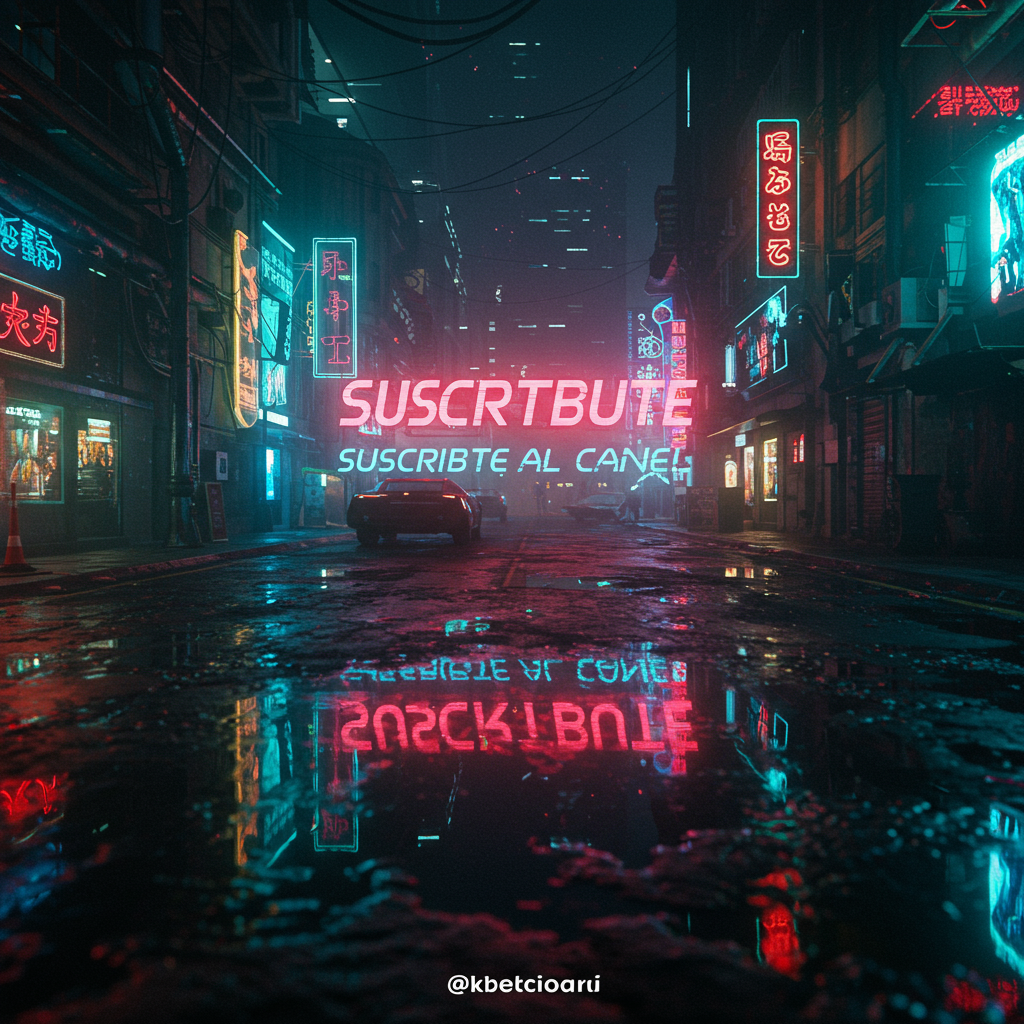

In [ ]:
response.images[0].show()

In [ ]:
response = imagen_model.generate_images(
    prompt='A macro photograph of a colorful tiny gnome riding a snail through a thick green forest, magical, fantasy',
    number_of_images=2,
    aspect_ratio="1:1"
)

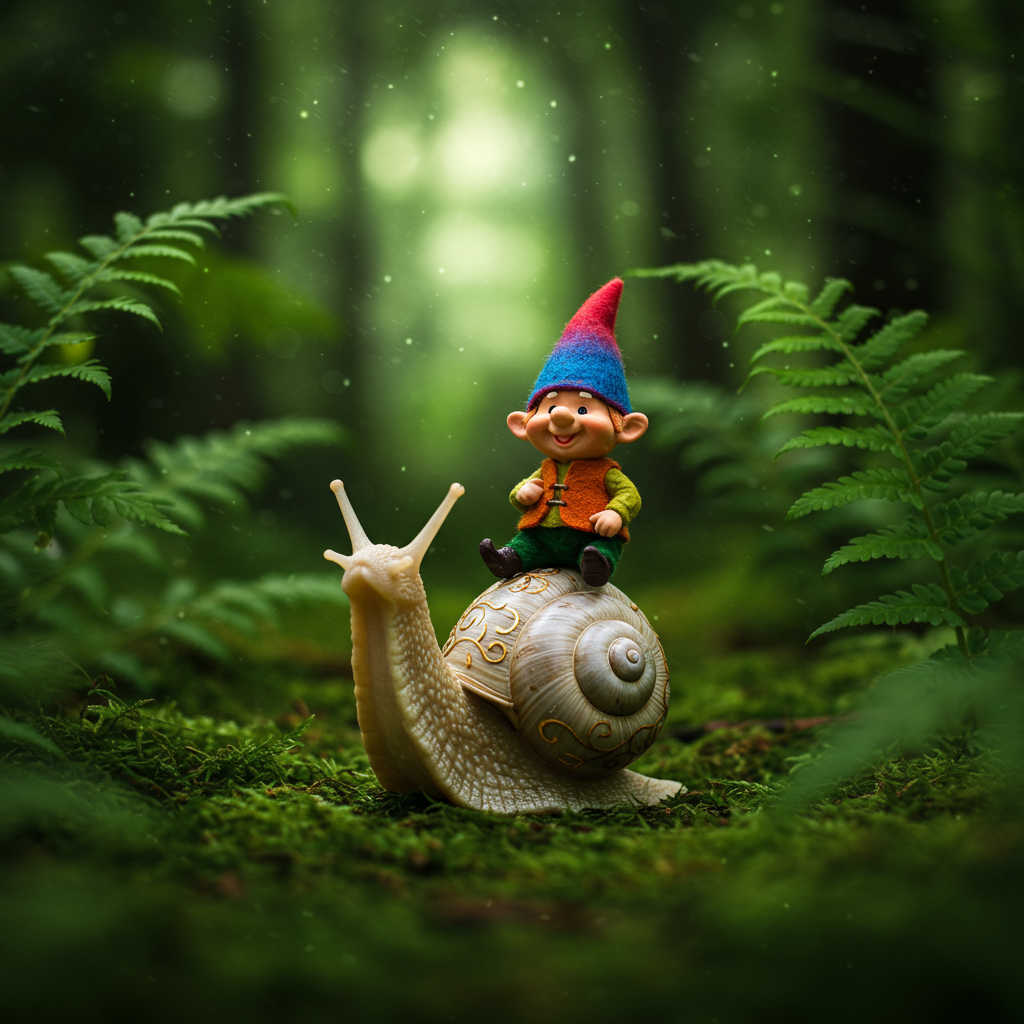

In [ ]:
response.images[0].show()